In [216]:
'''
grand average plots based on pile_all mat files generated by compare_constructs_GCaMP96uf
'''

from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ap_idx = 0 # 0: 1AP, 1: 3AP, 2:10AP, 3:160AP

plot_subset_for_paper = 1 # 0: plot entire dataset, save as html. 1: plot subset, save as pdf for paper
html_write_dir = r'D:\site\ilyakolb.github.io\interactive_norm_plots.html'
pdf_dir = r"D:\ufgcamp_paper_data\culture-screen-figs/norm_plots.pdf"
plot_mat = loadmat(r'data/unnormPlots_singleWells_struct.mat')

subplot_titles = ['peak dF/F', 'SNR', 'half-rise time (ms)', 'full rise time (ms)', 'half-decay time (ms)']
df_cols = subplot_titles.copy()
df_cols.insert(0,'construct')

# labels and order of legend
if plot_subset_for_paper:
    hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'GCaMP6s', 'jGCaMP7f', 'jGCaMP7s', 'XCaMP-Gf']# [h[0] for h in hits[0]]
else:
    hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s','jGCaMP8.712', 'GCaMP6s', 'GCaMP6f', 'jGCaMP7f', 'jGCaMP7s', 
                'jGCaMP7c', 'jGCaMP7b', 'XCaMP-Gf', 'XCaMP-G', 'XCaMP-Gf0']# [h[0] for h in hits[0]]

# magnify the kinetics of the following hits
magnify_hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s']

all_data = plot_mat['unnormPlots_singleWells_struct'][0]

all_constructs = [c[0] for c in all_plots['construct']]

# create dataframe
df = pd.DataFrame(columns=df_cols)

for construct_idx in range(len(all_constructs)):
    n_wells = len(all_data[construct_idx][1][ap_idx])
    n_cells = all_data[construct_idx][1].shape[1] # TEMPORARY BUGFIX
    
    dff = all_data[construct_idx][1][apidx]
    snr = all_data[construct_idx][2][apidx][:n_cells] # TEMPORARY SNR BUGFIX
    
    # get kinetics, convert to milliseconds
    halfrise = all_data[construct_idx][3][apidx]*1000
    fullrise = all_data[construct_idx][4][apidx]*1000
    halfdecay = all_data[construct_idx][5][apidx]*1000
    
    current_construct = [all_data[construct_idx][0][0]] * n_wells
    df_construct = pd.DataFrame(np.array([current_construct, dff, snr, halfrise, fullrise, halfdecay]).T, columns=df_cols)
    df = df.append(df_construct)

# cast data columns as floats
castdict = {x: 'float' for x in subplot_titles}
df = df.astype(castdict)
df.to_pickle('data/grand-avg-data.pkl')

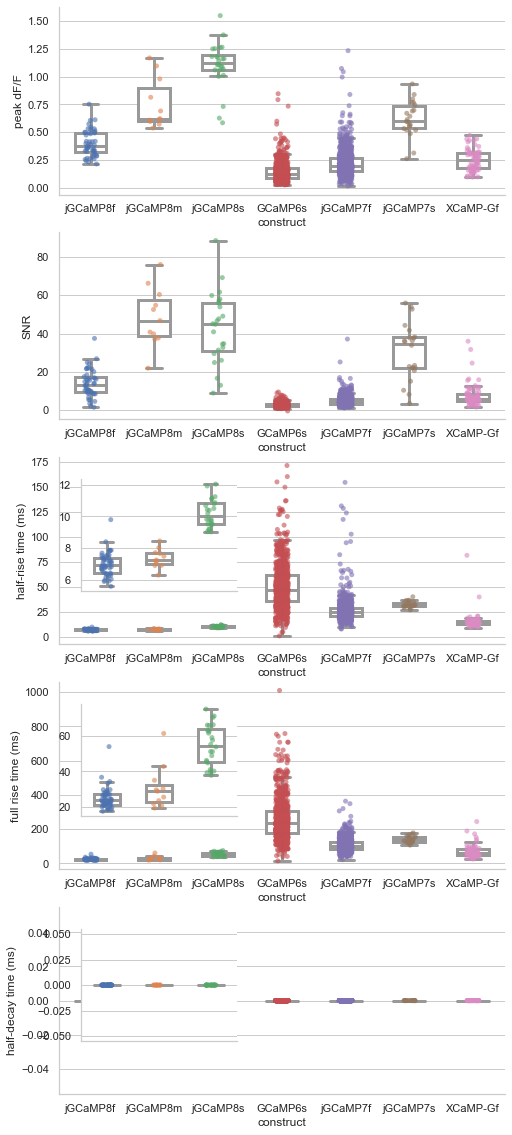

In [225]:

df_hits = df[df.construct.isin(hits_label)]
df_magnify_hits = df[df.construct.isin(magnify_hits_label)]

plt.figure(figsize=(8,20))
# ax = sns.violinplot(x="construct", y="half-rise time", data=df_hits, inner=None, scale='width')


sns.set_theme()
sns.set_style('whitegrid')


subplot_idx = 1
for var_to_plot in subplot_titles:
    plt.subplot(5,1,subplot_idx)
    subplot_idx +=1
    ax = sns.stripplot(x="construct",
                       y=var_to_plot, 
                       data=df_hits, 
                       order = hits_label, 
                       size=5,
                      alpha=0.6)
    ax = sns.boxplot(x="construct", 
                     y=var_to_plot, 
                     data=df_hits, 
                     order = hits_label, 
                     showfliers=False, 
                     color='white',
                     linewidth=3,
                     width=.5)
    #plt.xticks(rotation=-45)
    if 'time' in var_to_plot:
        # magnification inset
        ins_ax = inset_axes(ax, width="35%", height="60%", loc=2, borderpad=2)
        ins_ax = sns.stripplot(x="construct",
                            y=var_to_plot, 
                            data=df_magnify_hits, 
                            order = magnify_hits_label, 
                            size=5,
                            alpha=0.6)
        ins_ax = sns.boxplot(x="construct", 
                            y=var_to_plot, 
                            data=df_magnify_hits, 
                            order = magnify_hits_label, 
                            showfliers=False, 
                            color='white',
                            linewidth=3,
                            width=.5)
        ins_ax.set_xlabel(None)
        ins_ax.set_ylabel(None)
        ins_ax.set_xticklabels('')
    
sns.despine()


In [254]:
# compute grand average statistics
means = (df.groupby('construct').mean()*100).apply(np.round)/100 # just a way to get a reasonable number of sig figs
stds = (df.groupby('construct').std()*1000).apply(np.round)/1000
means.astype('str')+'+/-'+stds.astype('str')

,peak dF/F,SNR,half-rise time (ms),full rise time (ms),half-decay time (ms)
construct,,,,,
GCaMP6f,0.11+/-0.073,2.81+/-0.94,31.05+/-17.297,110.31+/-52.11,0.0+/-0.0
GCaMP6s,0.14+/-0.086,2.81+/-1.062,50.77+/-22.603,257.62+/-118.709,0.0+/-0.0
XCaMP-G,0.25+/-0.101,12.52+/-11.963,19.79+/-5.949,99.22+/-37.26,0.0+/-0.0
XCaMP-Gf,0.25+/-0.095,7.82+/-6.004,15.6+/-8.951,71.08+/-38.202,0.0+/-0.0
XCaMP-Gf0,0.2+/-0.082,7.99+/-6.748,16.91+/-15.307,83.05+/-46.503,0.0+/-0.0
jGCaMP7b,0.56+/-0.13,44.07+/-16.049,43.14+/-3.829,171.17+/-24.239,0.0+/-0.0
jGCaMP7c,0.24+/-0.087,10.96+/-5.978,30.2+/-7.006,165.75+/-34.878,0.0+/-0.0
jGCaMP7f,0.22+/-0.117,4.85+/-2.454,26.55+/-11.724,106.66+/-36.985,0.0+/-0.0
jGCaMP7s,0.62+/-0.159,30.74+/-14.727,32.44+/-3.126,139.78+/-19.601,0.0+/-0.0


In [250]:
(df.groupby('construct').mean()*100).apply(np.round)/100

,peak dF/F,SNR,half-rise time (ms),full rise time (ms),half-decay time (ms)
construct,,,,,
GCaMP6f,0.11,2.81,31.05,110.31,0.0
GCaMP6s,0.14,2.81,50.77,257.62,0.0
XCaMP-G,0.25,12.52,19.79,99.22,0.0
XCaMP-Gf,0.25,7.82,15.60,71.08,0.0
XCaMP-Gf0,0.20,7.99,16.91,83.05,0.0
jGCaMP7b,0.56,44.07,43.14,171.17,0.0
jGCaMP7c,0.24,10.96,30.20,165.75,0.0
jGCaMP7f,0.22,4.85,26.55,106.66,0.0
jGCaMP7s,0.62,30.74,32.44,139.78,0.0
